# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Import API keys from the api_keys module
from api_keys import weather_api_key

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mega
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port douglas
Processing Record 6 of Set 1 | jerome
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | nagqu
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | holualoa
Processing Record 14 of Set 1 | chibougamau
Processing Record 15 of Set 1 | yeppoon
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | douglas
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | pinheiro machado
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
import pandas as pd

city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City"].count()
city_data_df.count()


City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mega,4.0500,38.3000,290.67,81,91,5.09,ET,1697729555
1,anadyr,64.7500,177.4833,262.43,85,0,4.00,RU,1697729556
2,qaqortoq,60.7167,-46.0333,272.15,44,0,0.82,GL,1697729556
3,ushuaia,-54.8000,-68.3000,282.96,60,20,8.05,AR,1697729267
4,port douglas,-16.4833,145.4667,295.98,77,52,4.35,AU,1697729558


In [6]:
import os
print(os.getcwd())
city_data_df.to_csv('cities.csv')

c:\Users\kidus\OneDrive\Documents\GitHub\python-api-challenge\WeatherPy


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\kidus\OneDrive\Documents\GitHub\python-api-challenge\WeatherPy\output_data\cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mega,4.0500,38.3000,290.67,81,91,5.09,ET,1697729555
1,anadyr,64.7500,177.4833,262.43,85,0,4.00,RU,1697729556
2,qaqortoq,60.7167,-46.0333,272.15,44,0,0.82,GL,1697729556
3,ushuaia,-54.8000,-68.3000,282.96,60,20,8.05,AR,1697729267
4,port douglas,-16.4833,145.4667,295.98,77,52,4.35,AU,1697729558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

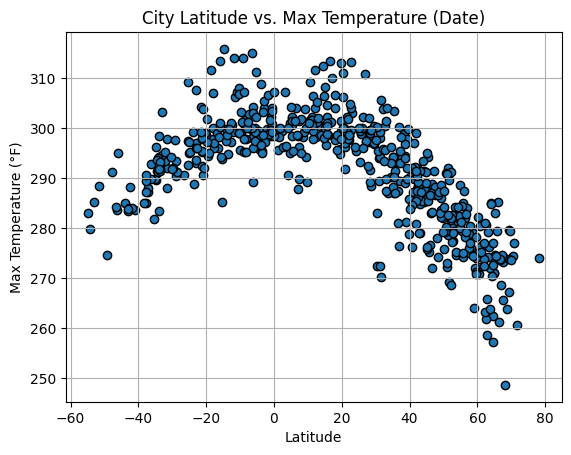

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

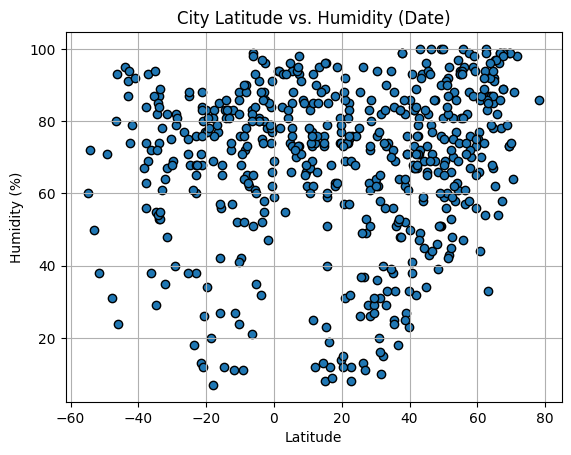

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

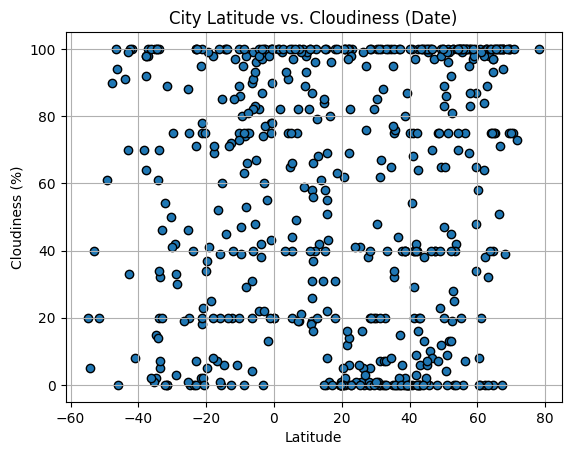

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

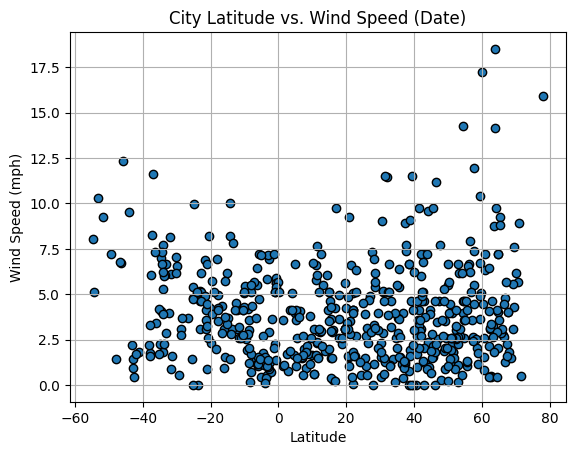

In [12]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mega,4.0500,38.3000,290.67,81,91,5.09,ET,1697729555
1,anadyr,64.7500,177.4833,262.43,85,0,4.00,RU,1697729556
2,qaqortoq,60.7167,-46.0333,272.15,44,0,0.82,GL,1697729556
5,jerome,42.7241,-114.5186,288.39,71,0,5.14,US,1697729559
9,nagqu,31.5000,92.0000,270.17,82,100,1.30,CN,1697729561


In [16]:
# Create a DataFrame with data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,282.96,60,20,8.05,AR,1697729267
4,port douglas,-16.4833,145.4667,295.98,77,52,4.35,AU,1697729558
6,puerto natales,-51.7236,-72.4875,288.40,38,20,9.26,CL,1697729477
7,grytviken,-54.2811,-36.5092,279.84,72,5,5.14,GS,1697729560
8,blackmans bay,-43.0167,147.3167,283.44,91,70,1.43,AU,1697729561


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6920713651872897


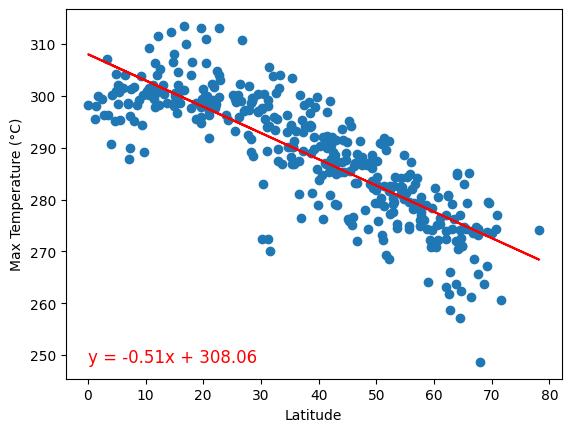

In [53]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


The r-value is: 0.494186803032862


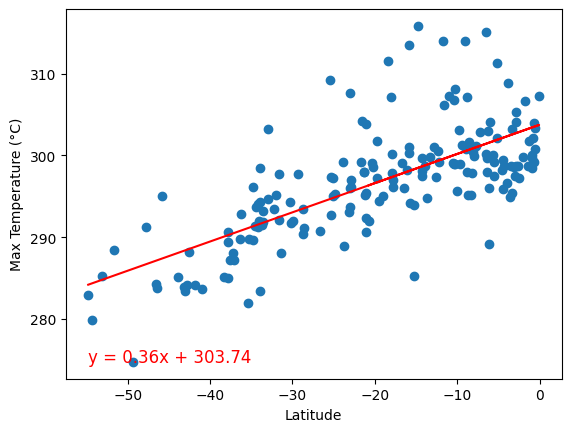

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The key takeaway from this pair of linear regressions is that as one gets closer to the equator (0 degrees latitude), the expected maximum temperature tends to increase. This intuitively aligns with our understanding since the equator receives the most direct sunlight exposure on Earth, resulting in higher overall temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03427565993250208


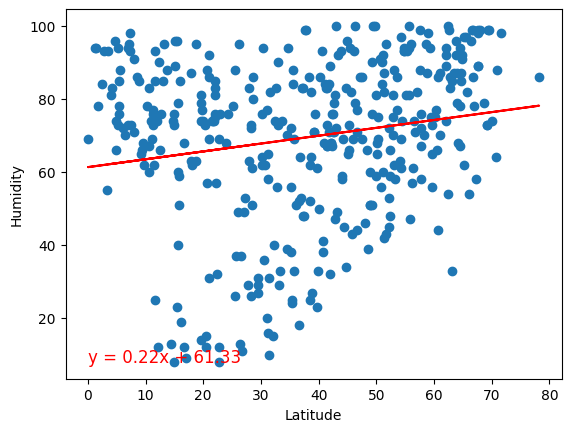

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


The r-value is: 0.002452428601558936


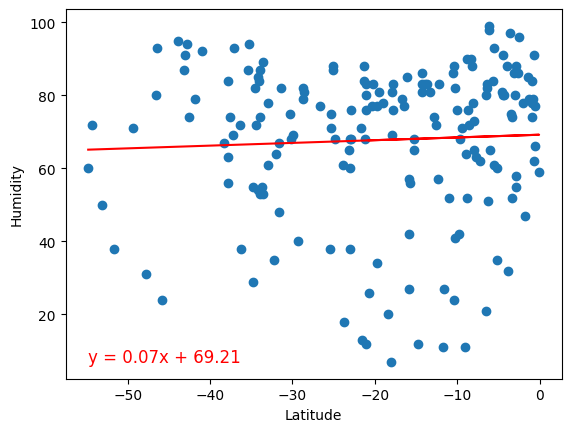

In [55]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

From our linear regressions, we can observe an interesting trend in the northern hemisphere. As latitude increases, there appears to be an increase in humidity. This finding may seem counterintuitive, as we often associate regions near the equator with higher humidity. However, it's possible that the humidity measurement refers to relative humidity rather than absolute humidity, which could explain these seemingly paradoxical observations. In contrast, in the southern hemisphere, there seems to be little to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02214220905818511


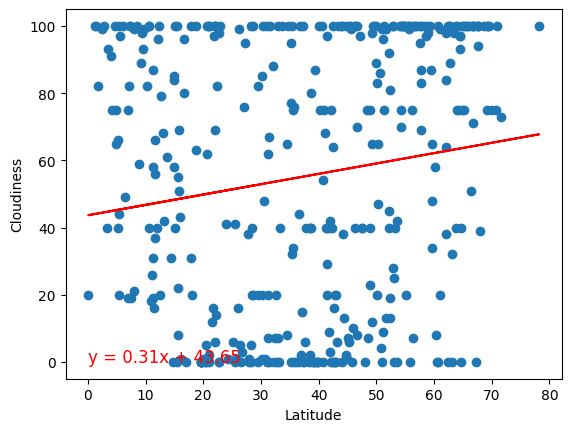

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


The r-value is: 0.02348052217754176


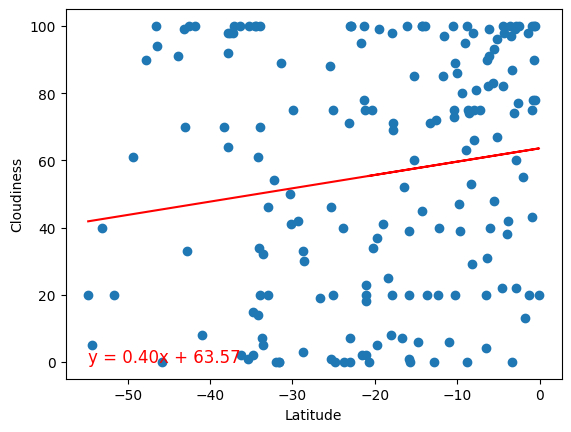

In [57]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE 

Based on our linear regressions, it appears that as one approaches 0 degrees of latitude (the equator), cloudiness tends to increase. This finding aligns with our intuitive understanding, and both the graphs for the northern and southern hemispheres support this observation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0348298781932223


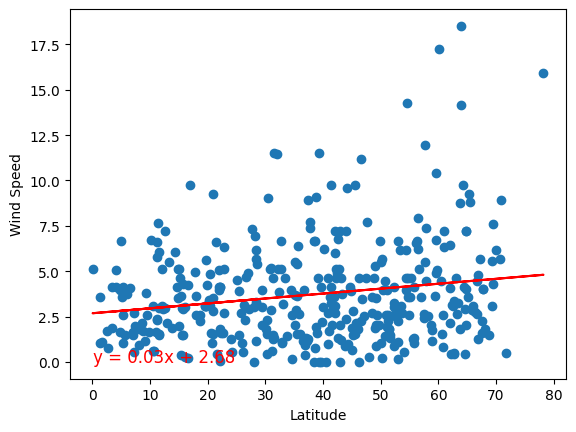

In [58]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


The r-value is: 0.08285789802939998


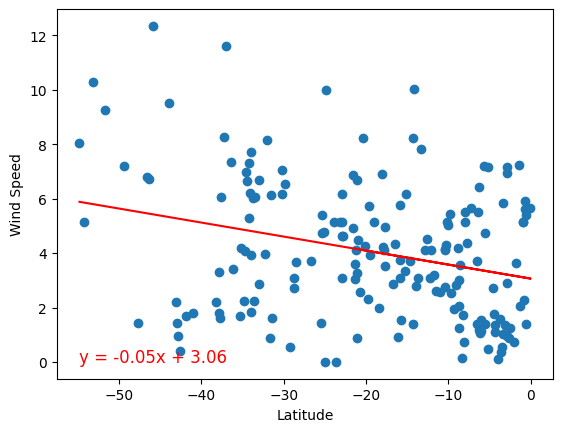

In [60]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Calculate R-squared value
r_squared = rvalue ** 2

print(f"The r-value is: {r_squared}")

# Create regression line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", label="Cities")
plt.plot(x_values, regress_values, "r-", label="Linear Regression")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Add the line equation in red
plt.text(min(x_values), min(y_values), line_eq, fontsize=12, color="red")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

From our linear regressions, we can observe that as you move north from the equator, there seems to be a slightly positive correlation between wind speeds and latitude. Conversely, as you approach the equator from the south, there appears to be a slight negative correlation between wind speeds and latitude.